**Factor Analysis for Wine Quality Control**

- Data EDA and Classification Prediction
- Data Source: https://www.kaggle.com/datasets/danielpanizzo/wine-quality?select=wineQualityWhites.csv
- Identify factors influencing wine quality and manage process variables to increase premium wine production
- Compare premium wine production before and after process variable control

In [2]:
df1=pd.read_csv('red.csv', sep=';')
df2=pd.read_csv('white.csv', sep=';')

df = pd.concat([df1, df2], axis=0)
df.reset_index(drop=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
import os
import matplotlib.pyplot as plt

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    IMAGES_PATH = os.path.join("images")
    os.makedirs(IMAGES_PATH, exist_ok=True)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


**Identifying Critical Factors Driving Product Quality**  

In [3]:
print('df', df.shape)

df (6497, 12)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [5]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [8]:
# set wine grade >=7 as premium, create target data
import numpy as np
df['target'] = np.where(df['quality']>6, 1, 0)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [9]:
df['target'].value_counts()

target
0    5220
1    1277
Name: count, dtype: int64

In [10]:
1277/(1277+5220)

0.19655225488687086

### Preliminary exploratory data analysis (EDA) to detect influential variables

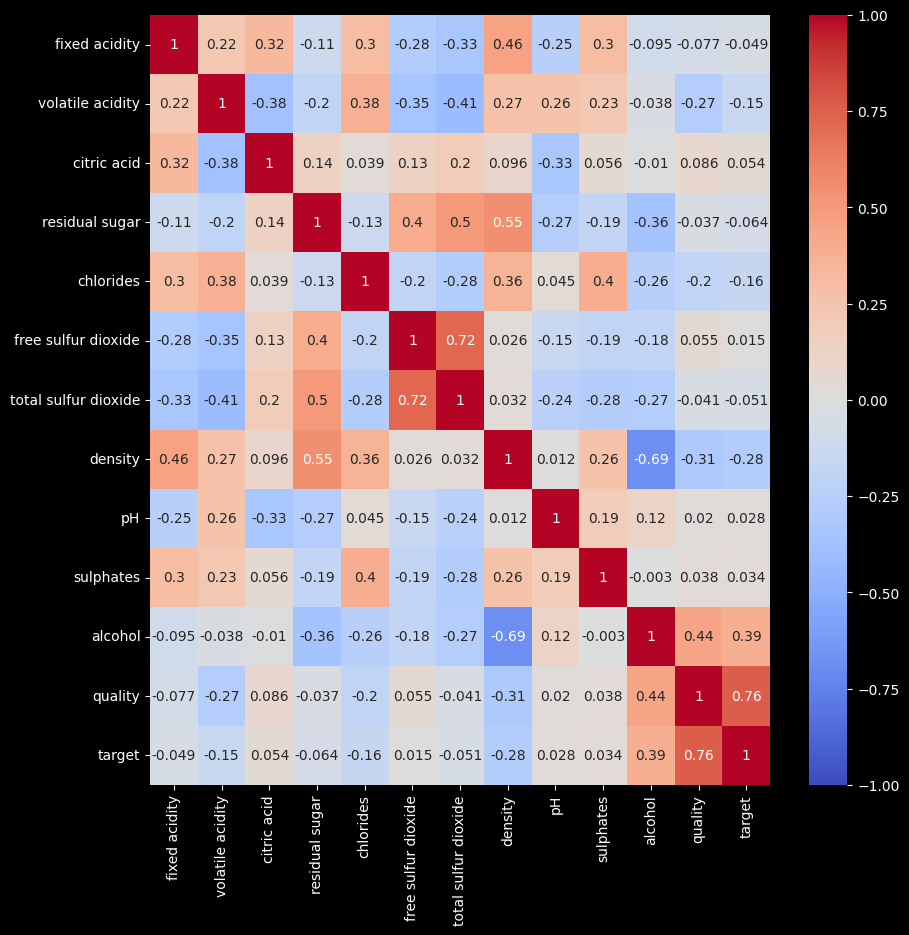

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');
plt.gcf().set_size_inches(10, 10)

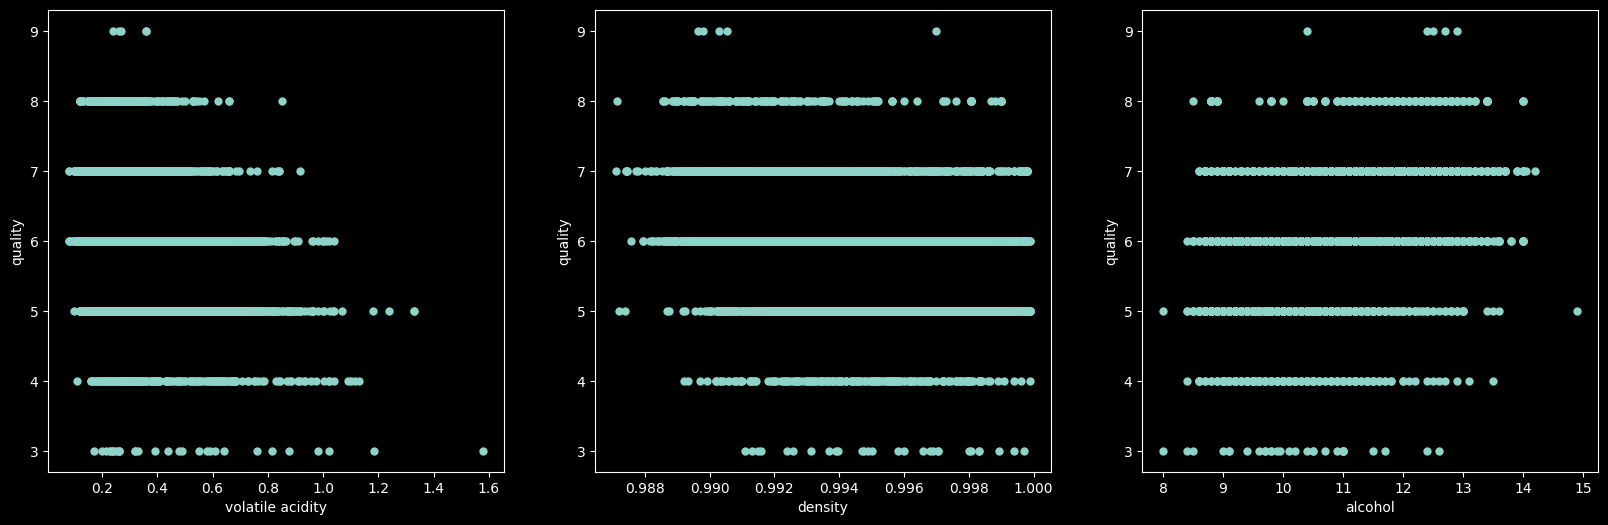

In [12]:
# Focused analysis on variables with correlation coefficient ≥ 0.2
# Notable trend: as quality grade increases, volatile acidity decreases

fig, axes = plt.subplots(1, 3)
sns.scatterplot(data = df, x='volatile acidity', y='quality', linewidth=0, ax=axes[0]);
sns.scatterplot(x=df[df['density']<1]['density'], y=df[df['density']<1]['quality'], linewidth=0, ax=axes[1]);
sns.scatterplot(x=df['alcohol'], y=df['quality'], linewidth=0, ax=axes[2]);
plt.gcf().set_size_inches(20, 6)

**Deriving Key Factors Using Linear Regression**  

In [13]:
# separate feature (X) and target variable (y) for model training
from sklearn.model_selection import train_test_split
from sklearn import metrics

df = df.copy()
X=df.drop(['quality', 'target'], axis=1)
Y=df['quality']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4547, 11)
(4547,)
(1950, 11)
(1950,)


### Model Training and Evaluation

In [14]:
# Using Linear Regression Model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [15]:
# Prediction
# Perform predictions on both training and test datasets to evaluate performance 

import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = mlr.predict(x_train)
y_pred_test = mlr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')

mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  0.5669208882557453
r2_score(r2):  0.29234914059732875

mae_test(mae):  0.5738554641690624
r2_score(r2):  0.28766050384098973


In [16]:
df_result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test}).reset_index(drop=True)
df_result['diff'] = df_result['Real Values'] - df_result['Predicted Values']
df_result.head(5)

,Real Values,Predicted Values,diff
0,5,5.589906,-0.589906
1,6,6.196808,-0.196808
2,8,6.291442,1.708558
3,5,5.659781,-0.659781
4,5,5.544764,-0.544764


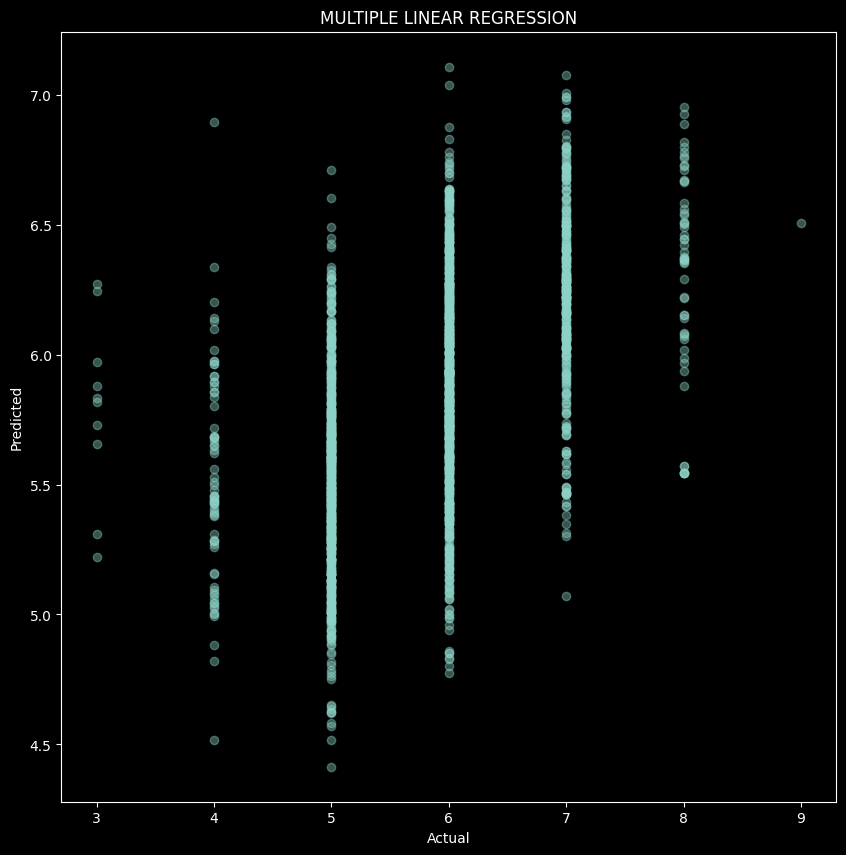

In [17]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.gcf().set_size_inches(10, 10)
plt.show()

In [18]:
df_result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':list(round(df_result['Predicted Values'],0))})
df_result['diff'] = df_result['Real Values'] - df_result['Predicted Values']
df_result.head(5)

,Real Values,Predicted Values,diff
4244,5,6.0,-1.0
854,6,6.0,0.0
799,8,6.0,2.0
2110,5,6.0,-1.0
1356,5,6.0,-1.0


In [19]:
abs(df_result['diff']).mean()

0.5307692307692308

In [20]:
y_pred_test

array([5.58990561, 6.19680773, 6.29144209, ..., 5.71394307, 5.33623472,
       5.72712657])

In [21]:
np.round(y_pred_test, 0).astype(int)

array([6, 6, 6, ..., 6, 5, 6])

In [22]:
# Calculate MAE for transformed target variable (y)
pred_test = np.round(y_pred_test, 0).astype(int)
mae_test = mean_absolute_error(y_test, pred_test )
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test,np.round(y_pred_test, 0))
print('r2_score(r2): ', r2_test)

mae_test(mae):  0.5307692307692308
r2_score(r2):  0.16104900608450623


### Multiple Regression Correlation Check

In [23]:
df_coef = pd.DataFrame({'col':X.columns, 'coef':mlr.coef_}).reset_index(drop=True)
df_coef

,col,coef
0,fixed acidity,0.085179
1,volatile acidity,-1.354152
2,citric acid,-0.102979
3,residual sugar,0.051358
4,chlorides,-0.454856
5,free sulfur dioxide,0.004259
6,total sulfur dioxide,-0.002360
7,density,-72.423820
8,pH,0.544744
9,sulphates,0.777557


In [24]:
# Limitations: Multicollinearity removal is required; difficult to interpret which variable truly drives the result
# Regression coefficients may be unstable and fail to accurately explain the influence of each variable on the target

df_corr = df.corr()
df_corr = df_corr[(abs(df_corr) > 0.5) & (df_corr != 1)]
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
fixed acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.552517,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,0.720934,NaN,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,0.720934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
density,NaN,NaN,NaN,0.552517,NaN,NaN,NaN,NaN,NaN,NaN,-0.686745,NaN,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# ▶ (density, residual sugar) → 0.552517
# ▶ (total sulfur dioxide, free sulfur dioxide) → 0.720934
# ▶ (pH, alcohol) → 0.720934

from sklearn.model_selection import train_test_split
from sklearn import metrics

X=df.drop(['quality', 'target', 'residual sugar', 'total sulfur dioxide', 'pH'], axis=1)
Y=df['quality']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4547, 8)
(4547,)
(1950, 8)
(1950,)


In [26]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [27]:
# Prediction
# Perform predictions on both data and test datasets to evaluate performance 

import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = mlr.predict(x_train)
y_pred_test = mlr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  0.5687456783301441
r2_score(r2):  0.2803619426880032

mae_test(mae):  0.5943381866064762
r2_score(r2):  0.27312795784101007


In [28]:
df_coef_2 = pd.DataFrame({'col':X.columns, 'coef':mlr.coef_}).reset_index(drop=True)
df_coef_2

,col,coef
0,fixed acidity,-0.000727
1,volatile acidity,-1.560785
2,citric acid,-0.265163
3,chlorides,-0.363942
4,free sulfur dioxide,0.003096
5,density,34.416899
6,sulphates,0.629540
7,alcohol,0.379530


In [29]:
# Data copy()
df_sc = df.copy()

In [30]:
# Standardized features using minmax_scale
from sklearn.preprocessing import minmax_scale

for i in list(df.columns[0:11]) :
  df_sc[i] = minmax_scale(df_sc[i], axis=0, copy=True)

df_sc.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,5,0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,5,0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,6,0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,0


In [31]:
# ▶ (density, residual sugar) → 0.552517
# ▶ (total sulfur dioxide, free sulfur dioxide) → 0.720934
# ▶ (pH, alcohol) → 0.720934

from sklearn.model_selection import train_test_split
from sklearn import metrics

X=df_sc.drop(['quality', 'target', 'residual sugar', 'total sulfur dioxide', 'pH'], axis=1)
Y=df_sc['quality']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4547, 8)
(4547,)
(1950, 8)
(1950,)


In [32]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [33]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = mlr.predict(x_train)
y_pred_test = mlr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  0.5729582698828021
r2_score(r2):  0.278472844882497

mae_test(mae):  0.5843300078915239
r2_score(r2):  0.2762248233931741


In [34]:
df_coef_3 = pd.DataFrame({'col':X.columns, 'coef':mlr.coef_}).reset_index(drop=True)
df_coef_3

,col,coef
0,fixed acidity,-0.100539
1,volatile acidity,-2.182157
2,citric acid,-0.284395
3,chlorides,-0.243822
4,free sulfur dioxide,1.153674
5,density,1.543661
6,sulphates,1.252290
7,alcohol,2.519772


**Deriving Key Quality Factors Using Machine Learning**  

In [35]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


### Data Preparation for Modeling

In [36]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split

X = df.drop(['quality', 'target'], axis=1)
Y = df['target']

# train/test split
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.3)
d_train = lgb.Dataset (x_train, label = y_train)

### Model Training and Evaluation

In [43]:
params = {}
params [ 'learning_rate'] = 0.02
params [ 'boosting_type'] = 'gbdt' # GradientBoostingDecisionTree
params ['objective'] = 'binary'
params [ 'metric' ] = 'binary_logloss' # metric for binary-class
params [ 'max_depth'] = 3
params [ 'num_leaves' ] = 6
params ['seed'] = 23456

clf = lgb.train (params, d_train, 1000) 

[LightGBM] [Info] Number of positive: 907, number of negative: 3640
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1497
[LightGBM] [Info] Number of data points in the train set: 4547, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199472 -> initscore=-1.389597
[LightGBM] [Info] Start training from score -1.389597
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [38]:
y_pred_train = clf.predict(x_train)
y_pred_train

array([0.64149465, 0.27624334, 0.05920041, ..., 0.00883966, 0.05554073,
       0.11323415])

In [39]:
from sklearn.metrics import classification_report

y_pred_train = clf.predict(x_train)
for i in range(0,len(y_pred_train)):
    if y_pred_train[i]>=.5:
       y_pred_train[i]=1
    else:
       y_pred_train[i]=0

y_pred_test = clf.predict(x_test)
for i in range(0,len(y_pred_test)):
    if y_pred_test[i]>=.5:
       y_pred_test[i]=1
    else:
       y_pred_test[i]=0

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3640
           1       0.80      0.54      0.64       907

    accuracy                           0.88      4547
   macro avg       0.85      0.75      0.79      4547
weighted avg       0.87      0.88      0.87      4547

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1580
           1       0.64      0.44      0.52       370

    accuracy                           0.85      1950
   macro avg       0.76      0.69      0.71      1950
weighted avg       0.83      0.85      0.83      1950



### Analyze feature importance (Feature IMP)

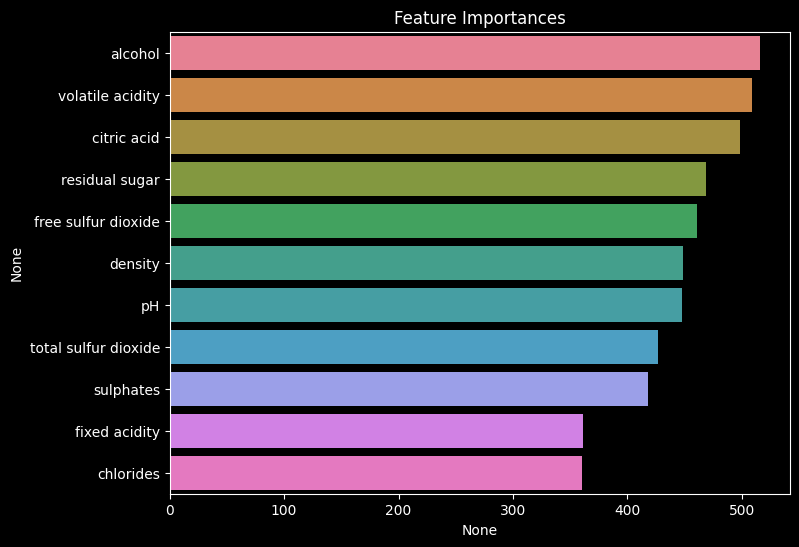

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = clf.feature_importance()
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:21]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(
    x=ftr_top20,
    y=ftr_top20.index,
    palette=sns.color_palette("husl", len(ftr_top20))
)

plt.show()

### Save and Read Model

In [41]:
import pickle
saved_model = pickle.dumps(clf)

clf_from_pickle = pickle.loads(saved_model)